<IPython.core.display.Javascript object>


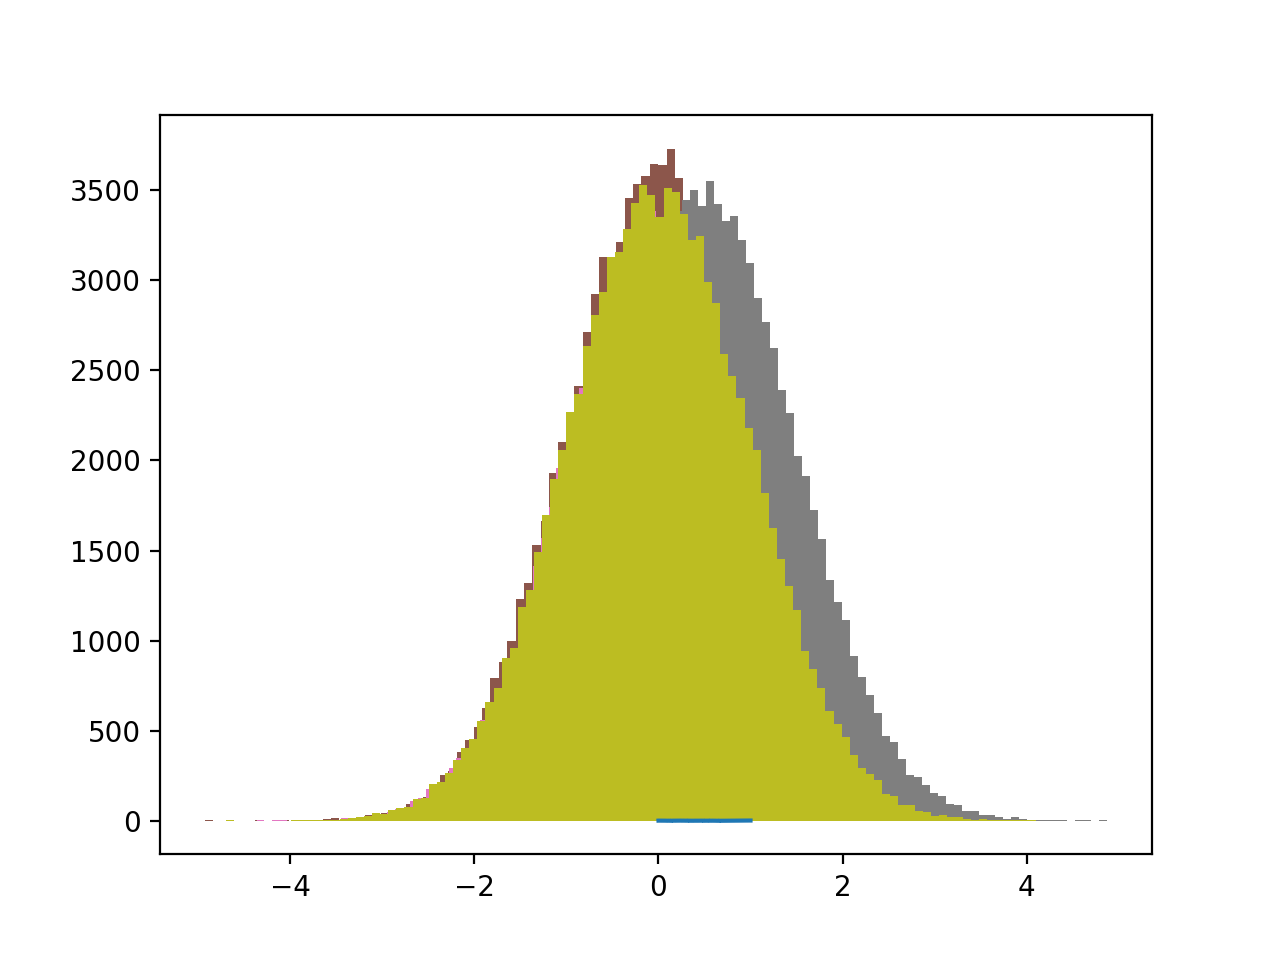

In [3]:
# Simulating Browinan Motion
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

T = 1
N = 100000
dt = T/N
Z = np.zeros(N+1)
t = np.zeros(N+1)

Z[0] = 0.0
t[0] = 0.0

for k in range(N):
    dZ = np.random.randn()*np.sqrt(dt)
    Z[k+1] = Z[k] + dZ
    t[k+1] = t[k] + dt
    
plt.plot(t,Z)
plt.show()

In [12]:
# BSM_example (Euler_Richardson)

import numpy as np
from scipy import stats

# BSM closed-form solution (for call) 
def bsm_call_value(S0, K, T, r, sigma):
    d1= (np.log(S0/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2= (np.log(S0/K)+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    call_value = (S0*stats.norm.cdf(d1,0.0,1.0) - K*np.exp(-r*T)*stats.norm.cdf(d2,0.0,1.0))
    return call_value

# BSMOPM parameter setting
S_0= 100.
K= 100.
T= 1.0
r= 0.01
sigma= 0.4

np.random.seed(0)

N = int(1e7)
M = 126
dt = T/M
St_1 = np.ones(N)*S_0
St_2 = np.ones(N)*S_0

# Euler Discretization Scheme with Richardson Extrapolation
temp_Z = np.zeros(N)

for k in range(M):
    Z = np.random.randn(N)
    St_1 = St_1 + r*St_1*dt + sigma*St_1*Z*np.sqrt(dt)
    temp_Z = temp_Z + Z
    
    if(k%2==1):
        St_2 = St_2 + r*St_2*2*dt + sigma*St_2*temp_Z*np.sqrt(dt)
        temp_Z = np.zeros(N)

C_0_1 = np.exp(-r*T)*(St_1-K)*(St_1 > K)
C_0_2 = np.exp(-r*T)*(St_2-K)*(St_2 > K)        
C_0 = 2*C_0_1 - C_0_2

print('Estimated Call Price (95% C.I.) = ',np.mean(C_0),' ± ',1.96*np.std(C_0)/np.sqrt(N))
print('True Call Price = ', bsm_call_value(S_0,K,T,r,sigma))

Estimated Call Price (95% C.I.) =  16.27627587133836  ±  0.01866985776459475
True Call Price =  16.27544888310898


In [13]:
# BSM_example

import numpy as np
from scipy import stats

# BSM closed-form solution (for call) 
def bsm_call_value(S0, K, T, r, sigma):
    d1= (np.log(S0/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2= (np.log(S0/K)+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    call_value = (S0*stats.norm.cdf(d1,0.0,1.0) - K*np.exp(-r*T)*stats.norm.cdf(d2,0.0,1.0))
    return call_value

# BSMOPM parameter setting
S_0= 100.
K= 100.
T= 1.0
r= 0.01
sigma= 0.4

np.random.seed(0)

N = int(1e7)
M = 125
dt = T/M
St = np.ones(N)*S_0

# Euler Discretization Scheme
for k in range(M):
    Z = np.random.randn(N)
    St = St + r*St*dt + sigma*St*Z*np.sqrt(dt)

C_0 = np.exp(-r*T)*(St-K)*(St > K)

print('Estimated Call Price (95% C.I.) = ',np.mean(C_0),' ± ',1.96*np.std(C_0)/np.sqrt(N))
print('True Call Price = ', bsm_call_value(S_0,K,T,r,sigma))

Estimated Call Price (95% C.I.) =  16.284918758810424  ±  0.018618307083550653
True Call Price =  16.27544888310898


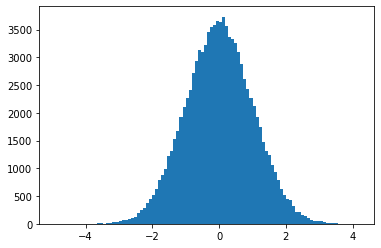

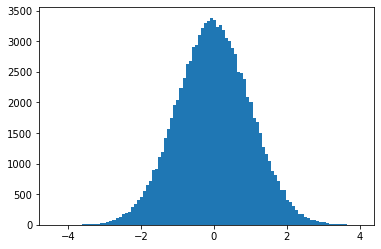

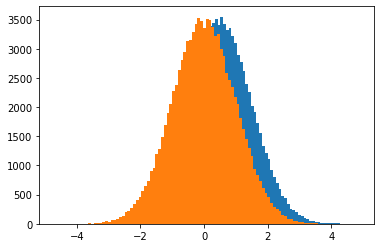

In [1]:
# generating Normal Random Var. validation Example : The Box-Muller Algorithm
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

N = int(1e5)

# Uniform Dist. 만들때는 rand (randn은 정규분포))
U1 = np.random.rand(N)
U2 = np.random.rand(N)

X = np.sqrt(-2*np.log(U1))*np.cos(2*np.pi*U2)
Y = np.sqrt(-2*np.log(U1))*np.sin(2*np.pi*U2)

# 막대기 bean 100개 표시
plt.hist(X, 100)
plt.show()

plt.hist(Y, 100)
plt.show()

Z1 = np.random.randn(N)
Z2 = np.random.normal(size=N, loc=0.5, scale=1.0) # 평균 0.5, 분산 1인 정규분포

plt.hist(Z2, 100)
plt.hist(Z1, 100)
plt.show()

ValueError: operands could not be broadcast together with shapes (0,13) (100,) 